In [3]:
# Celda para importar librerías, costantes, etc.
import tensorflow as tf
import pandas as pd
import numpy as np
import librosa
import mido
import math
import collections

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

from matplotlib import pyplot as plt

plt.rcParams['text.usetex'] = False

PATH = '/Volumes/TheVault/Documentos Mac/Documentos Universidad/4o Curso/2o Cuatrimestre/Trabajo de Fin de Grado/maestro-v3.0.0/'

def get_dataframe(path=PATH + 'maestro-v3.0.0.csv'):
    df = pd.read_csv(path)
    return df

In [4]:
FILE=True
DPI = 150

df = get_dataframe('maestro-v3.0.0.csv')
df.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,data_cached,epochs_trained
0,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433,True,0
1,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588,True,0
2,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508,True,0
3,Alexander Scriabin,"5 Preludes, Op.15",validation,2009,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,400.557826,True,0
4,Alexander Scriabin,"Entragete, Op.63",test,2009,2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MI...,2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MI...,163.745830,True,0


In [5]:
df_train, df_validation, df_test = df[df['split'] == 'train'], df[df['split'] == 'validation'], df[df['split'] == 'test']
df_train, df_validation, df_test

(          canonical_composer  \
 0                 Alban Berg   
 1         Alexander Scriabin   
 5         Alexander Scriabin   
 8         Alexander Scriabin   
 9         Alexander Scriabin   
 ..                       ...   
 845  Wolfgang Amadeus Mozart   
 847  Wolfgang Amadeus Mozart   
 848  Wolfgang Amadeus Mozart   
 850  Wolfgang Amadeus Mozart   
 853  Wolfgang Amadeus Mozart   
 
                                        canonical_title  split  year  \
 0                                         Sonata Op. 1  train  2017   
 1                        24 Preludes Op. 11, No. 13-24  train  2004   
 5    Etude Op. 2 No.1;  Etudes Op. 8, Nos. 5, 11 an...  train  2013   
 8                  Etude in D-flat Major, Op. 8 No. 10  train  2011   
 9                                     Etudes from Op.8  train  2006   
 ..                                                 ...    ...   ...   
 845          Sonata in D-Major, K. 311, First Movement  train  2011   
 847                      

In [7]:
performances = [len(df_train), len(df_validation), len(df_test)]
performances

[583, 118, 153]

In [8]:
compositions = [len(set(df_train['canonical_title'])), len(set(df_validation['canonical_title'])), len(set(df_test['canonical_title']))]
compositions

[583, 118, 153]

In [9]:
durations = [sum(df_train['duration']) / (60 * 60), sum(df_validation['duration']) / (60 * 60), sum(df_test['duration']) / (60 * 60)]
durations

[96.93909835225189, 16.95544249722681, 17.64713712410634]

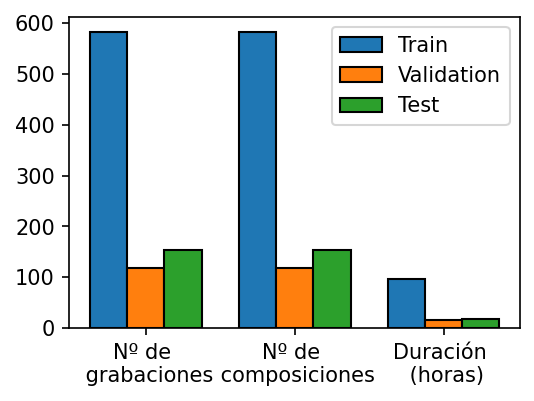

In [10]:
plt.figure(figsize=(3.875, 2.75), dpi=DPI)
datos = np.array([performances, compositions, durations]).T
labels = ['Train', 'Validation', 'Test']
X = np.arange(3)
plt.bar(X + 0.00, datos[:][0], width=0.25, edgecolor='black')
plt.bar(X + 0.25, datos[:][1], width=0.25, edgecolor='black')
plt.bar(X + 0.50, datos[:][2], width=0.25, edgecolor='black')
plt.xticks(X+0.25, ["Nº de \n grabaciones","Nº de \n composiciones","Duración \n (horas)"])
plt.legend(labels, loc=1)

# Outputing the plot to an image or showning it
if FILE:
    plt.savefig('statistics.png',  dpi=DPI, bbox_inches='tight')
else:
    plt.show()

In [11]:
df_composers = df['canonical_composer']
counts = collections.defaultdict(lambda: 0)

for idx, composer in df_composers.items():
    counts[composer] += 1

rank = np.array(sorted(counts.items(), key=lambda k_v: k_v[1], reverse=True)).T
rank[0]

array(['Frédéric Chopin', 'Franz Schubert', 'Ludwig van Beethoven',
       'Johann Sebastian Bach', 'Franz Liszt', 'Sergei Rachmaninoff',
       'Claude Debussy', 'Wolfgang Amadeus Mozart', 'Robert Schumann',
       'Domenico Scarlatti', 'Joseph Haydn', 'Alexander Scriabin',
       'Johannes Brahms', 'Felix Mendelssohn',
       'Franz Schubert / Franz Liszt', 'Isaac Albéniz', 'Muzio Clementi',
       'Pyotr Ilyich Tchaikovsky',
       'Pyotr Ilyich Tchaikovsky / Mikhail Pletnev',
       'Johann Sebastian Bach / Ferruccio Busoni', 'Nikolai Medtner',
       'César Franck', 'George Frideric Handel', 'Leoš Janáček',
       'Mily Balakirev', 'Edvard Grieg',
       'Felix Mendelssohn / Sergei Rachmaninoff',
       'Franz Liszt / Vladimir Horowitz',
       'Johann Sebastian Bach / Egon Petri',
       'Johann Sebastian Bach / Franz Liszt', 'Modest Mussorgsky',
       'Pyotr Ilyich Tchaikovsky / Sergei Rachmaninoff',
       'Richard Wagner / Franz Liszt', 'Alban Berg', 'Antonio Soler',
       '

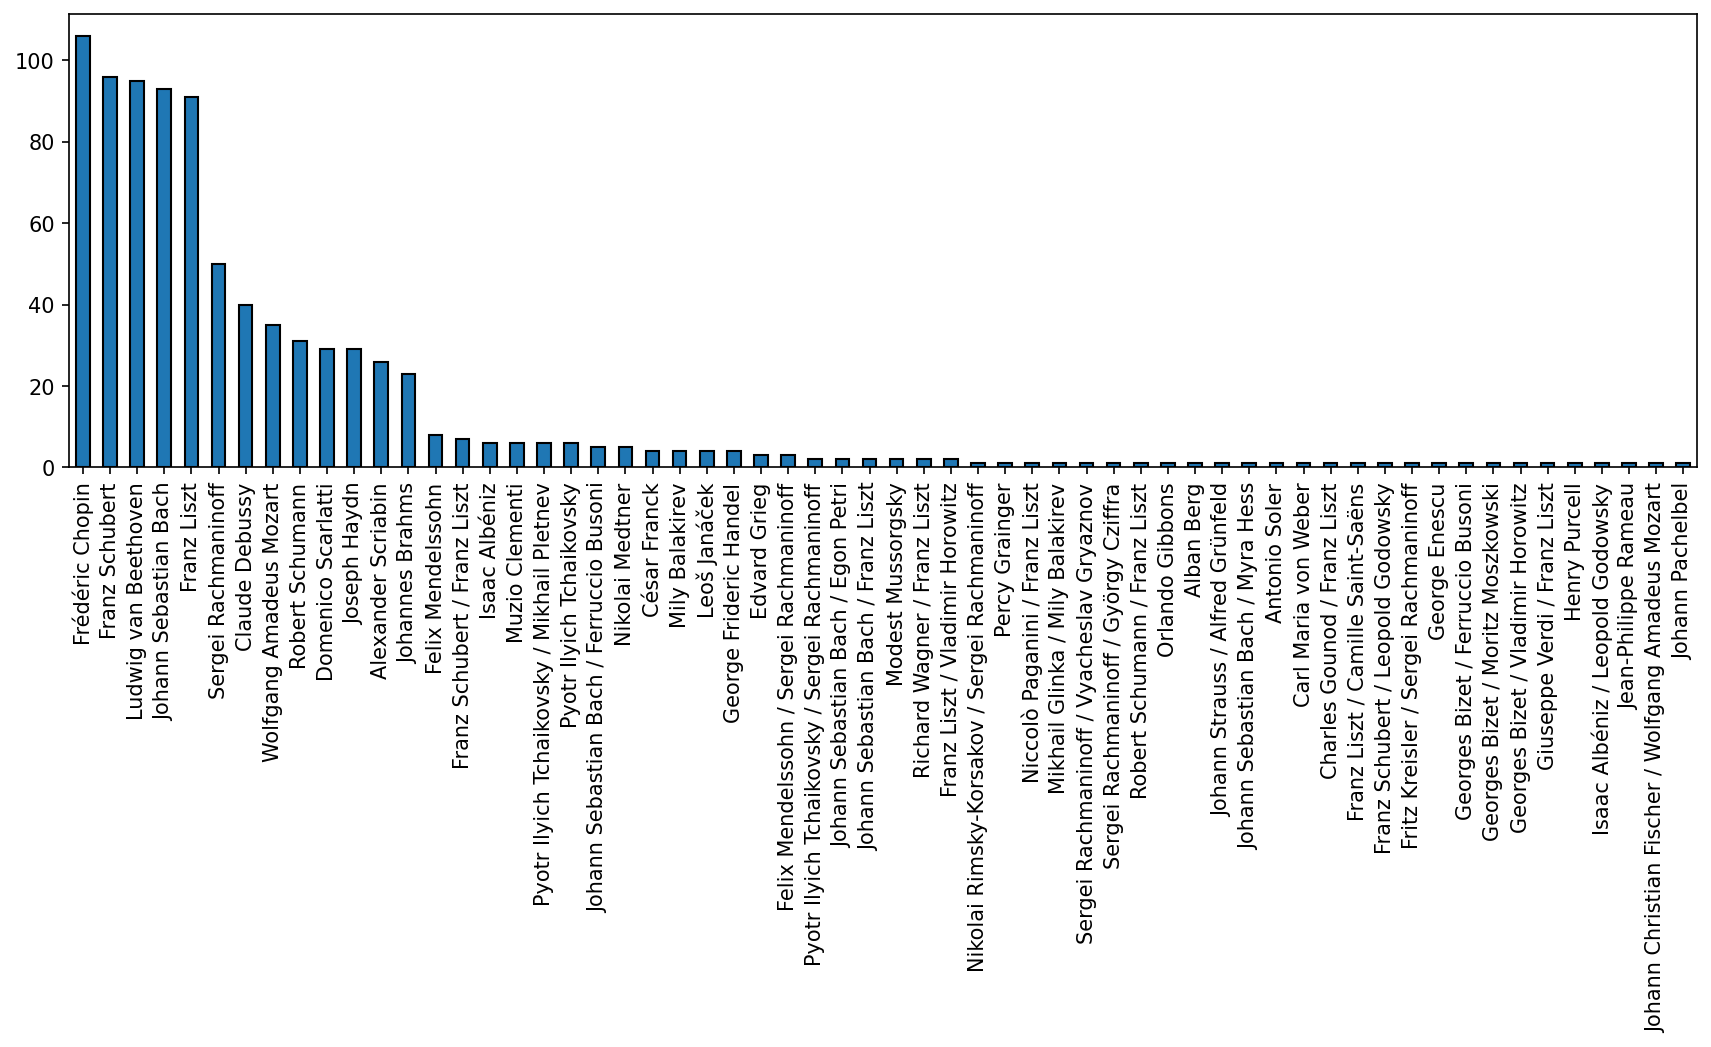

In [12]:
fig, ax = plt.subplots(figsize=[14, 4], dpi=DPI)
title_composers = df.canonical_title.astype('string') + ', ' + \
        df.canonical_composer.astype('string').map(lambda x: x.split(' ')[-1])
df.groupby('canonical_composer')\
    .size()\
    .sort_values(ascending=False)\
    .plot(kind='bar', xlabel='', edgecolor='black')

# Outputing the plot to an image or showning it
if FILE:
    plt.savefig('composers.png',  dpi=DPI, bbox_inches='tight')
else:
    plt.show()

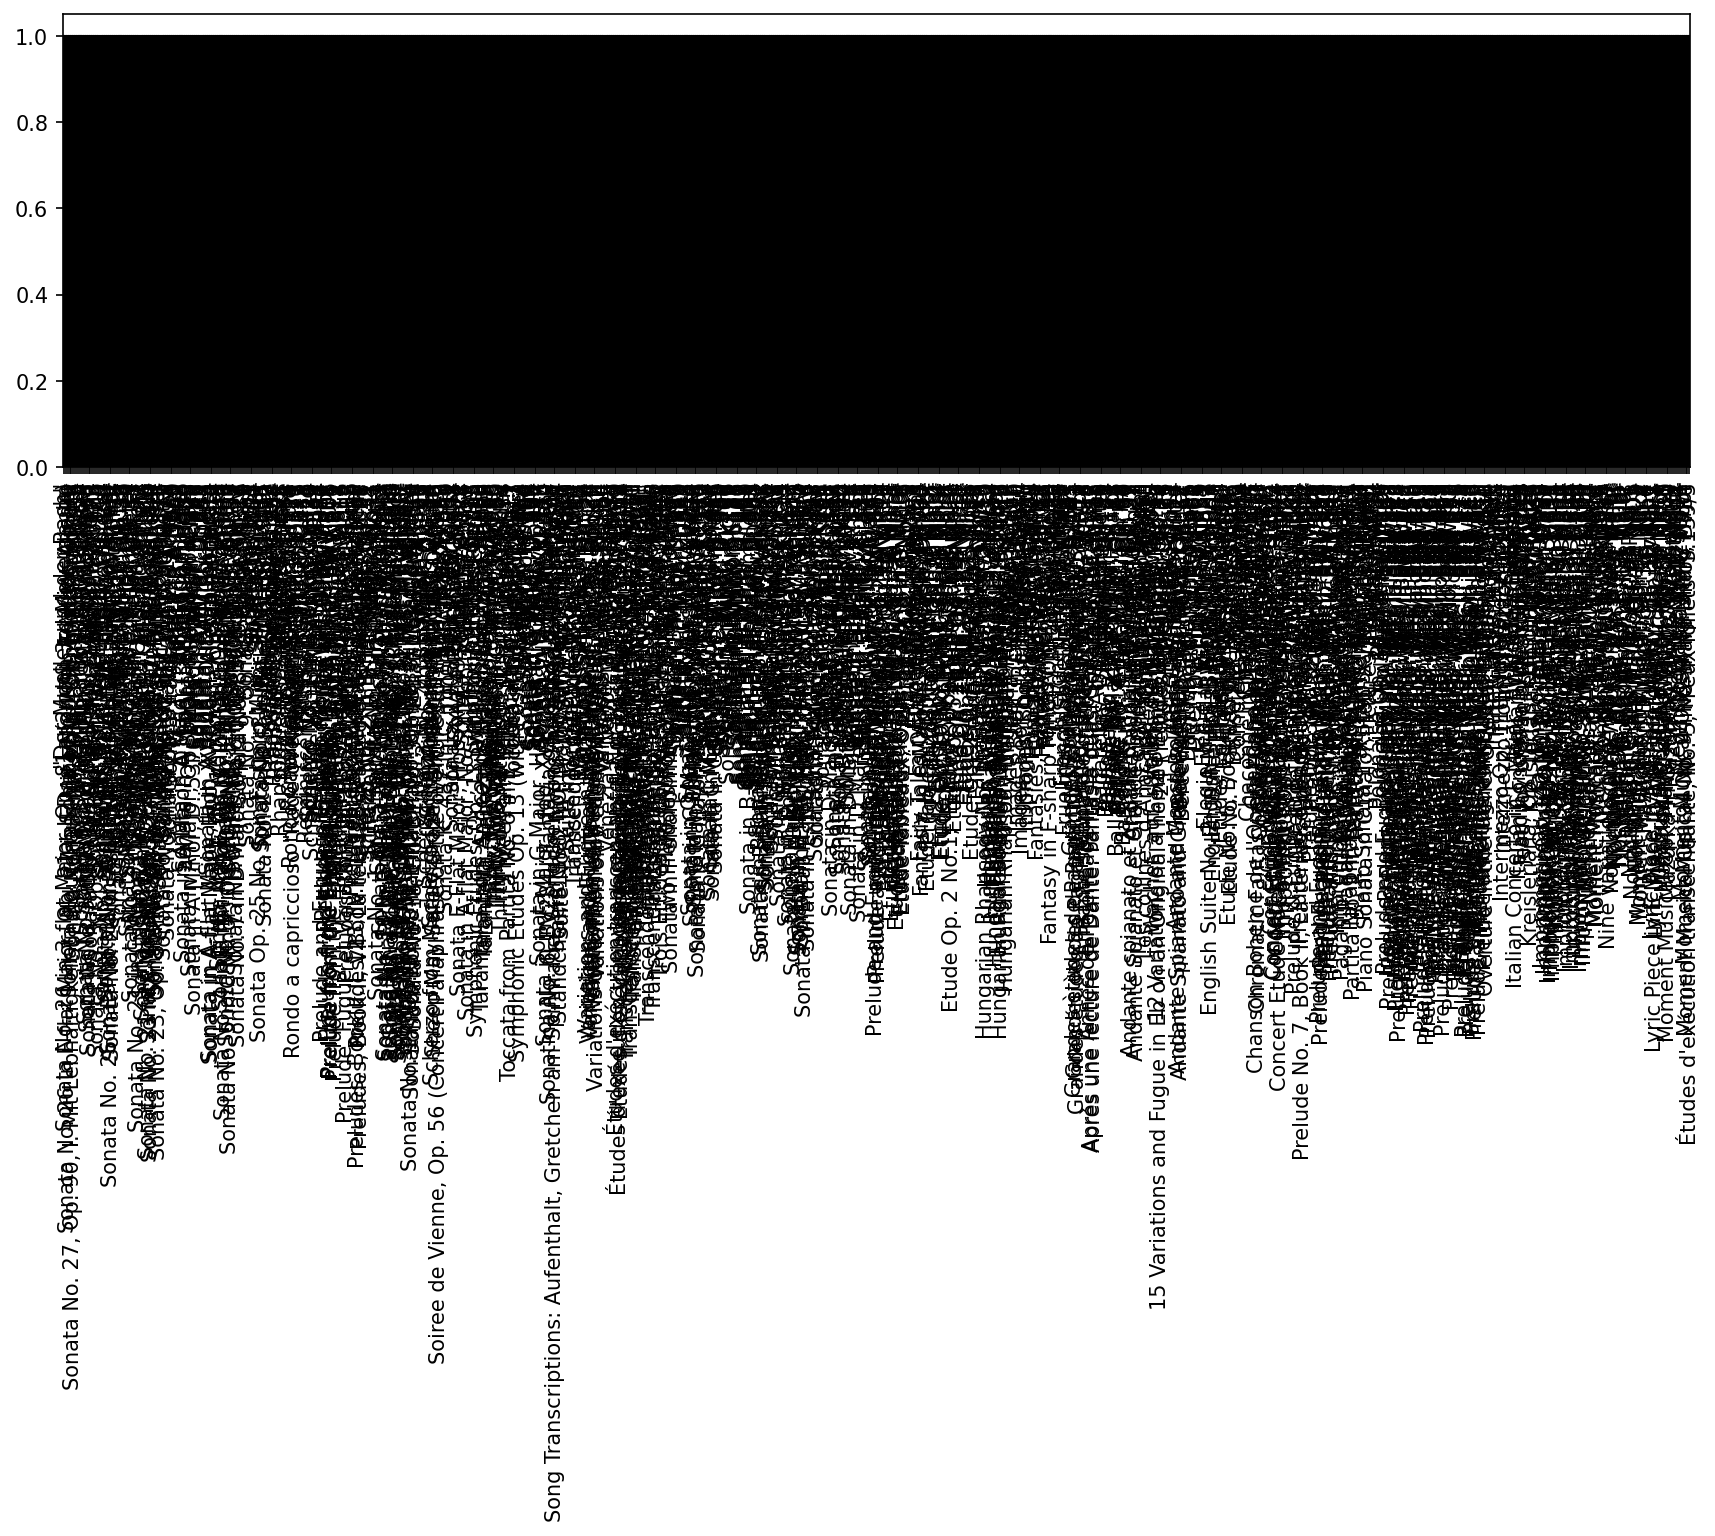

In [13]:
fig, ax = plt.subplots(figsize=[14, 4], dpi=DPI)
title_composers = df.canonical_title.astype('string') + ', ' + \
        df.canonical_title.astype('string').map(lambda x: x.split(' ')[-1])
df.groupby('canonical_title')\
    .size()\
    .sort_values(ascending=False)\
    .plot(kind='bar', xlabel='', edgecolor='black')

# Outputing the plot to an image or showning it
if FILE:
    plt.savefig('works.png',  dpi=DPI, bbox_inches='tight')
else:
    plt.show()

In [14]:
df = df.drop_duplicates(subset='canonical_title', keep="last")

In [27]:
len(df)

1276

In [14]:
len(df)

854

In [15]:
df.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,data_cached,epochs_trained
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433,True,0
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588,True,0
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508,True,0
5,Alexander Scriabin,"5 Preludes, Op.15",validation,2009,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,400.557826,True,0
6,Alexander Scriabin,"Entragete, Op.63",test,2009,2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MI...,2009/MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MI...,163.745830,True,0


In [16]:
df.to_csv('maestro-v3.0.0.csv', index=False)